# Function Approximation        

In [1]:
import deepxde as dde
import numpy as np

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# testing function
def func(x):
    """
    x: array_like, N x D_in
    y: array_like, N x D_out
    """
    return x * np.sin(5 * x)

In [3]:
# domain
geom = dde.geometry.Interval(-1, 1)

In [4]:
num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

In [5]:
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

In [6]:
model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

Compiling model...
Building feed-forward neural network...
'build' took 0.034137 s

'compile' took 0.098304 s



In [7]:
loss_history, train_state = model.train(iterations=10000)

Training model...

Step      Train loss    Test loss     Test metric   
0         [2.93e-01]    [2.53e-01]    [1.10e+00]    


2024-09-08 11:02:36.231215: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


1000      [1.47e-04]    [1.68e-04]    [2.83e-02]    
2000      [1.01e-05]    [6.11e-05]    [1.71e-02]    
3000      [4.02e-07]    [4.02e-05]    [1.39e-02]    
4000      [8.83e-08]    [3.77e-05]    [1.34e-02]    
5000      [9.77e-08]    [3.72e-05]    [1.34e-02]    
6000      [5.73e-07]    [3.55e-05]    [1.30e-02]    
7000      [1.37e-04]    [1.96e-04]    [3.06e-02]    
8000      [2.97e-08]    [3.51e-05]    [1.30e-02]    
9000      [2.65e-08]    [3.46e-05]    [1.29e-02]    
10000     [1.21e-07]    [3.44e-05]    [1.28e-02]    

Best model at step 9000:
  train loss: 2.65e-08
  test loss: 3.46e-05
  test metric: [1.29e-02]

'train' took 2.385497 s



Saving loss history to data/loss.dat ...
Saving training data to data/train.dat ...
Saving test data to data/test.dat ...


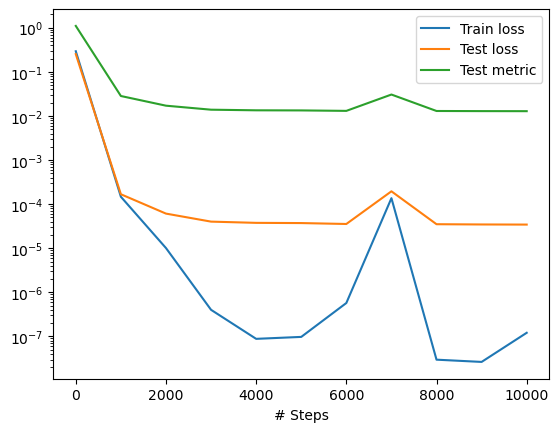

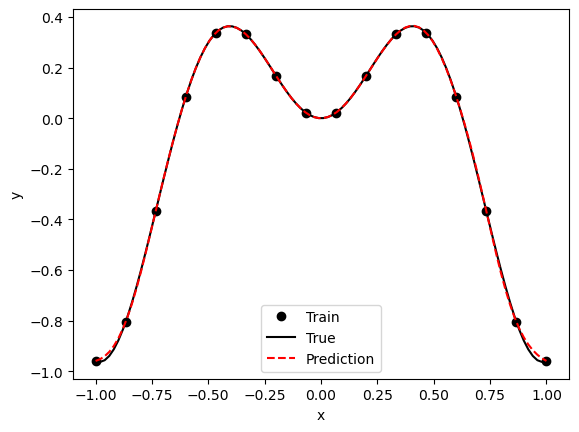

In [8]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True, output_dir="data")